In [3]:
from typing import TypedDict
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

class OverallState(TypedDict):
    foo: int

class PrivateState(TypedDict):
    bar: int

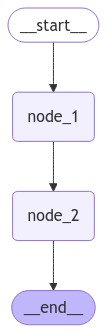

{'foo': 4}

In [4]:
def node_1(state: OverallState)-> PrivateState:
    return {"bar" : state["foo"] + 1}

def node_2(state: PrivateState)-> OverallState:
    return {"foo" : state["bar"] + 2}

builder = StateGraph(OverallState)

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({"foo" : 1})

### Input/Output Schema

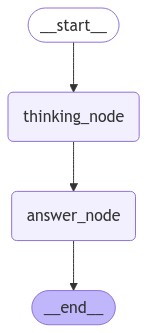

In [6]:
class OverallState(TypedDict):
    input: str
    output: str
    notes: str

def thinking_node(state: OverallState) -> OverallState:
    return {"output": "bye", "notes": "thinking about the llm"}

def answer_node(state: OverallState) -> OverallState:
    return {"output" : "BYe HIjabie"}

builder = StateGraph(OverallState)

builder.add_node("thinking_node", thinking_node)
builder.add_node("answer_node", answer_node)
builder.add_edge(START, "thinking_node")
builder.add_edge("thinking_node", "answer_node")
builder.add_edge("answer_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke({"input" : "HI"})

{'input': 'HI', 'output': 'BYe HIjabie', 'notes': 'thinking about the llm'}

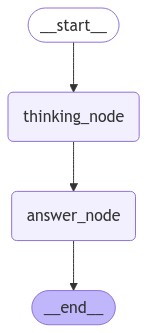

In [10]:
class INputState(TypedDict):
    input: str

class OutputState(TypedDict):
    output: str

class OverallState(TypedDict):
    input: str
    output: str
    notes: str

def thinking_node(state: INputState) -> OverallState:
    return {"output": "bye", "notes": "thinking about the llm"}

def answer_node(state: OverallState) -> OutputState:
    return {"output" : f"{state['input']} HIjabie"}

builder = StateGraph(OverallState, input=INputState, output=OutputState)

builder.add_node("thinking_node", thinking_node)
builder.add_node("answer_node", answer_node)
builder.add_edge(START, "thinking_node")
builder.add_edge("thinking_node", "answer_node")
builder.add_edge("answer_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
graph.invoke({"input" : "Hi"})

{'output': 'Hi HIjabie'}